In [2]:
# Pobieranie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Załadowanie datasetu

df = pd.read_csv('/Users/iMac/Documents/Event datasets/multistore/2020-Jan.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,1005073,2232732093077520756,construction.tools.light,samsung,1130.02,519698804,69b5d72f-fd6e-4fed-aa23-1286b2ca89a0
1,2020-01-01 00:00:01 UTC,view,1005192,2232732093077520756,construction.tools.light,meizu,205.67,527767423,7f596032-ccbf-4643-9bad-e36a209512b4
2,2020-01-01 00:00:01 UTC,view,100063693,2053013552427434207,apparel.shirt,turtle,136.43,519046195,d1e2f343-84bb-49bd-b13d-ca0f1ed9910e
3,2020-01-01 00:00:01 UTC,view,5100816,2232732103831716449,apparel.shoes,xiaomi,29.95,518269232,0444841c-38ef-410c-b11f-7b35ea4e5991
4,2020-01-01 00:00:02 UTC,view,100014325,2232732103294845523,apparel.shoes.step_ins,intel,167.20,587748686,31b7d4cf-dfac-4895-9927-90fa3254f860


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55967041 entries, 0 to 55967040
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.8+ GB


In [5]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    5044890
brand            6540255
price                  0
user_id                0
user_session          19
dtype: int64

In [6]:
print(df.duplicated().sum())

137596


In [ ]:
df_1 = df.drop_duplicates()

In [23]:
df_1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80
1,2019-12-01 00:00:00 UTC,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a
2,2019-12-01 00:00:01 UTC,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76
3,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
4,2019-12-01 00:00:02 UTC,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e


In [ ]:
#Posegregowanie kolumn na te które posiadają wartości kategoryczne i numeryczne

object_columns  = df_1.select_dtypes(['object']).columns

int_columns  = df_1.select_dtypes(['int64']).columns

print(object_columns)
print(int_columns)

Index(['event_time', 'event_type', 'category_code', 'brand', 'user_session'], dtype='object')
Index(['product_id', 'category_id', 'user_id'], dtype='object')


In [9]:
df_1.describe()

,product_id,category_id,price,user_id
count,67430759.00,67430759.00,67430759.00,67430759.00
mean,17632129.80,2179029002724050688.00,274.81,548109128.18
std,27307943.11,81677991335484688.00,348.11,28593510.20
min,1000544.00,2053013551865397504.00,0.00,29515875.00
25%,1005273.00,2053013563693335296.00,61.46,518836205.00
50%,5300101.00,2232732093077520640.00,154.42,546861340.00
75%,21404032.00,2232732097708032512.00,332.03,573971369.00
max,100064491.00,2232732138325672448.00,2574.07,595414563.00


In [19]:
#Przegląd wartości i ich liczebności w zmiennych kategorycznych

for col in object_columns:
    print(df_1[col].value_counts())
    print("\n**************\n")

event_time
2019-12-25 15:46:35 UTC    146
2019-12-26 05:45:32 UTC    143
2019-12-24 09:13:14 UTC    142
2019-12-29 14:20:50 UTC    139
2019-12-29 10:55:06 UTC    138
                          ... 
2019-12-08 23:20:25 UTC      1
2019-12-08 23:20:21 UTC      1
2019-12-08 23:20:14 UTC      1
2019-12-08 23:20:04 UTC      1
2019-12-10 23:30:23 UTC      1
Name: count, Length: 2654047, dtype: int64

**************

event_type
view        62984129
cart         3284602
purchase     1162028
Name: count, dtype: int64

**************

category_code
construction.tools.light            16472151
electronics.clocks                   2738224
appliances.personal.massager         2608270
apparel.shoes                        2539909
appliances.kitchen.refrigerators     2397766
                                      ...   
appliances.environment.fan              5347
appliances.kitchen.microwave            3594
computers.components.sound_card         3470
auto.accessories.light                   632
country

/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_26629/2362199287.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['hour'] = purchases['event_time'].dt.hour


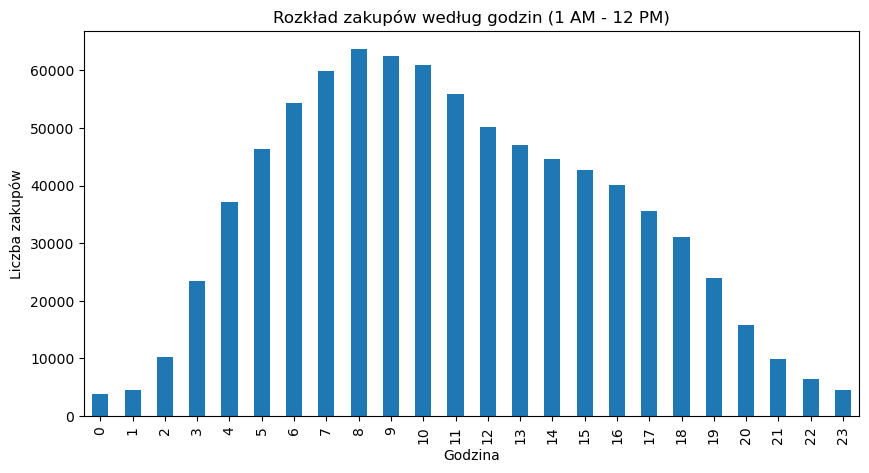

In [8]:
# Upewnij się, że kolumna 'event_time' jest typu datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Filtruj zdarzenia typu 'purchase'
purchases = df[df['event_type'] == 'purchase']

# Wyciągnij godzinę z czasu zdarzenia
purchases['hour'] = purchases['event_time'].dt.hour

# Grupuj zakupy według godzin
hourly_purchases = purchases['hour'].value_counts().sort_index()

# Wizualizacja
import matplotlib.pyplot as plt

hourly_purchases.plot(kind='bar', title='Rozkład zakupów według godzin (1 AM - 12 PM)', figsize=(10, 5))
plt.xlabel('Godzina')
plt.ylabel('Liczba zakupów')
plt.show()


/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_26629/673511708.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['hour'] = purchases['event_time'].dt.hour


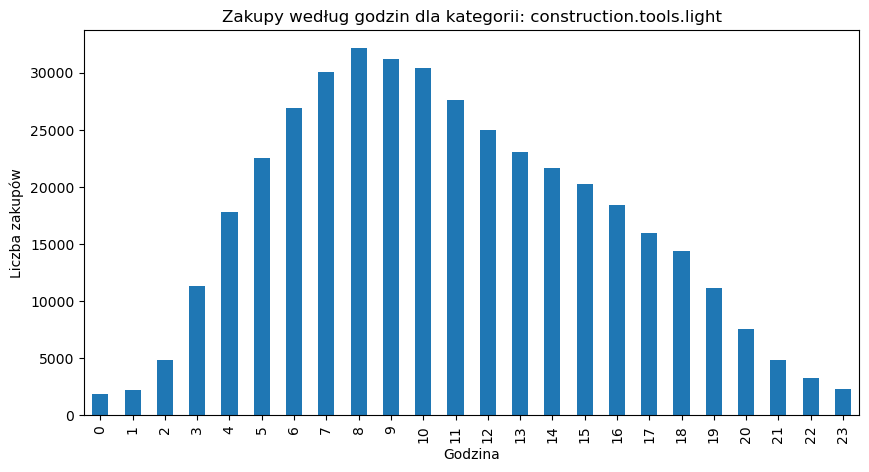

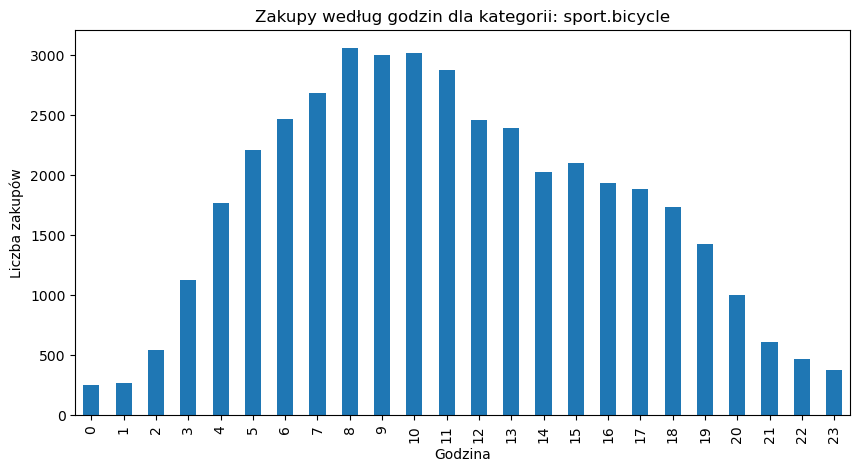

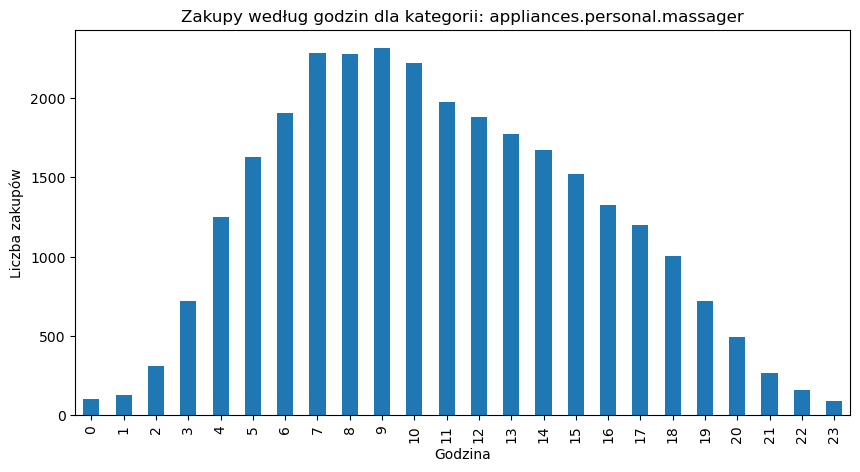

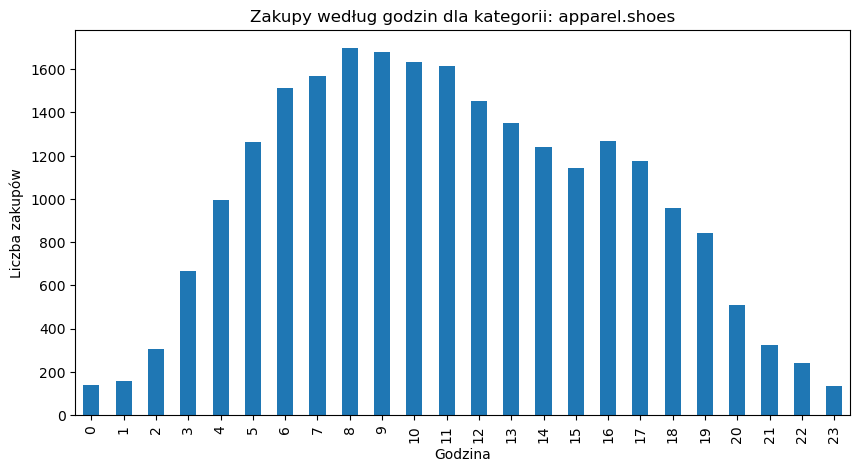

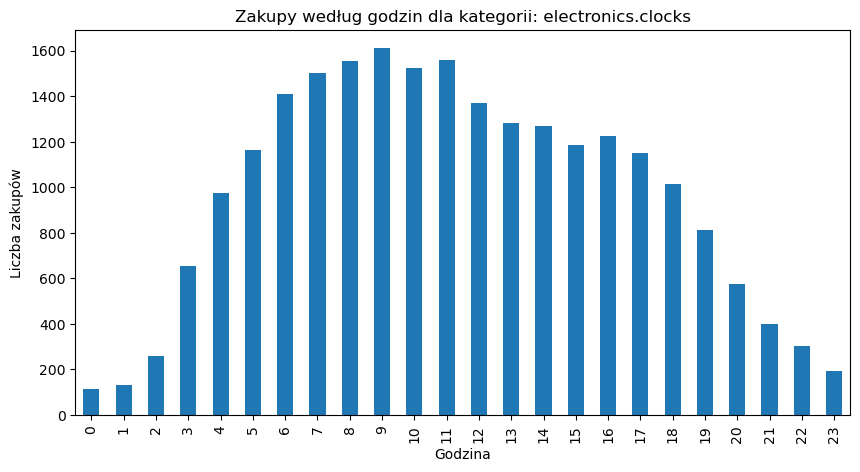

In [10]:
# Upewnij się, że kolumna 'event_time' jest typu datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Filtruj zdarzenia typu 'purchase'
purchases = df[df['event_type'] == 'purchase']

# Wyciągnij godzinę z czasu zdarzenia
purchases['hour'] = purchases['event_time'].dt.hour

# Grupuj zakupy według godzin i kategorii
hourly_category_purchases = purchases.groupby(['hour', 'category_code']).size().unstack(fill_value=0)

# Wizualizacja dla wybranych kategorii
import matplotlib.pyplot as plt

# Wybierz kilka kategorii (np. top 5 z największą liczbą zakupów)
top_categories = purchases['category_code'].value_counts().head(5).index

# Rysuj wykresy dla wybranych kategorii
for category in top_categories:
    hourly_category_purchases[category].plot(kind='bar', title=f'Zakupy według godzin dla kategorii: {category}', figsize=(10, 5))
    plt.xlabel('Godzina')
    plt.ylabel('Liczba zakupów')
    plt.show()


/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_26629/2702073296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['weekday'] = purchases['event_time'].dt.day_name()  # Nazwa dnia tygodnia


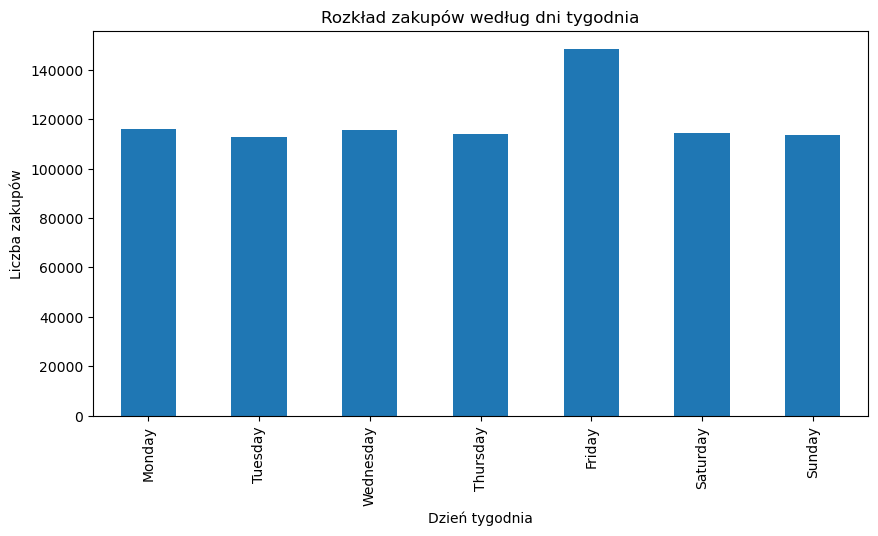

In [12]:
# Wyciągnij dzień tygodnia z czasu zdarzenia
purchases['weekday'] = purchases['event_time'].dt.day_name()  # Nazwa dnia tygodnia

# Predefiniowana kolejność dni tygodnia
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grupuj zakupy według dni tygodnia
weekday_purchases = purchases['weekday'].value_counts()

# Sortowanie dni tygodnia według predefiniowanej kolejności
weekday_purchases = weekday_purchases.reindex(ordered_days)

# Wizualizacja
weekday_purchases.plot(kind='bar', title='Rozkład zakupów według dni tygodnia', figsize=(10, 5))
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba zakupów')
plt.show()



/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_26629/1209702817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['day_of_month'] = purchases['event_time'].dt.day


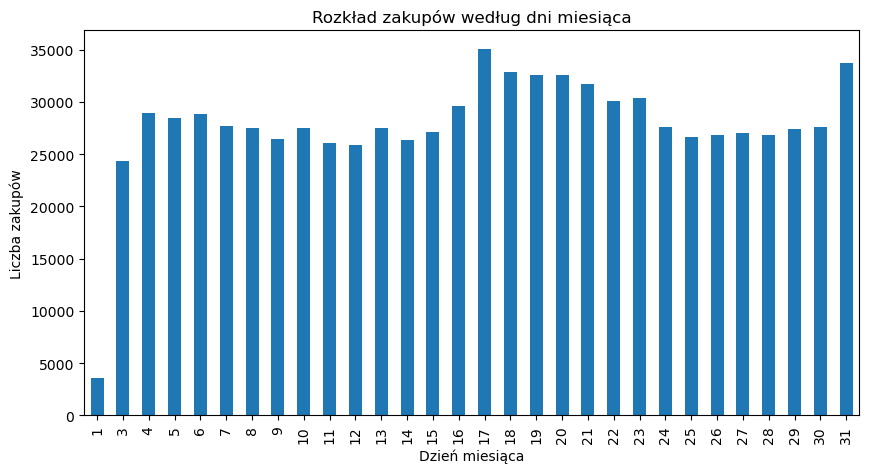

In [13]:
# Wyciągnij dzień miesiąca z czasu zdarzenia
purchases['day_of_month'] = purchases['event_time'].dt.day

# Grupuj zakupy według dni miesiąca
day_of_month_purchases = purchases['day_of_month'].value_counts().sort_index()

# Wizualizacja
day_of_month_purchases.plot(kind='bar', title='Rozkład zakupów według dni miesiąca', figsize=(10, 5))
plt.xlabel('Dzień miesiąca')
plt.ylabel('Liczba zakupów')
plt.show()

event_type
view       93.79
cart        4.72
purchase    1.49
Name: proportion, dtype: float64


<Axes: title={'center': 'Rozkład typów zdarzeń'}, xlabel='event_type'>

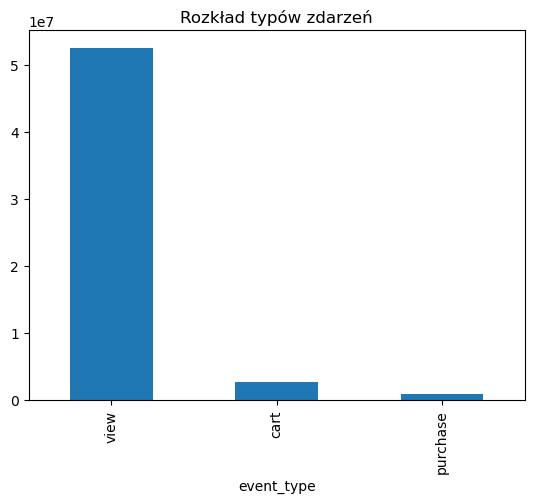

In [14]:
print(df['event_type'].value_counts(normalize=True) * 100)  # Procentowy udział zdarzeń
df['event_type'].value_counts().plot(kind='bar', title='Rozkład typów zdarzeń')  # Wykres


In [ ]:
# Filtracja i analiza dla każdego zdarzenia
event_types = df['event_type'].unique()  # Pobierz unikalne typy zdarzeń
for event in event_types:
    print(f"Najpopularniejsze produkty dla zdarzenia: {event}")
    popular_products = df[df['event_type'] == event]['product_id'].value_counts().head(10)
    print(popular_products)
    print()

In [16]:
# Filtracja i analiza dla kategorii
for event in event_types:
    print(f"Najpopularniejsze kategorie dla zdarzenia: {event}")
    popular_categories = df[df['event_type'] == event]['category_code'].value_counts().head(10)
    print(popular_categories)
    print()

Najpopularniejsze kategorie dla zdarzenia: view
category_code
construction.tools.light            13560829
electronics.clocks                   1895008
sport.bicycle                        1850951
appliances.kitchen.refrigerators     1843478
apparel.shoes                        1778426
appliances.personal.massager         1749232
electronics.audio.headphone          1261194
computers.peripherals.printer        1105489
appliances.environment.vacuum         984886
appliances.kitchen.washer             773112
Name: count, dtype: int64

Najpopularniejsze kategorie dla zdarzenia: cart
category_code
construction.tools.light            1124033
sport.bicycle                        142908
appliances.personal.massager          90056
apparel.shoes                         85912
electronics.clocks                    73645
appliances.kitchen.refrigerators      64347
electronics.audio.headphone           47100
appliances.environment.vacuum         43974
appliances.kitchen.washer             43295
com

In [17]:
# Filtracja i analiza dla marek
for event in event_types:
    print(f"Najpopularniejsze marki dla zdarzenia: {event}")
    popular_brands = df[df['event_type'] == event]['brand'].value_counts().head(10)
    print(popular_brands)
    print()

Najpopularniejsze marki dla zdarzenia: view
brand
samsung    6464723
apple      4873252
xiaomi     3993983
huawei     1478071
lucente     810192
sony        696609
lg          613642
lenovo      537257
oppo        522841
bosch       519374
Name: count, dtype: int64

Najpopularniejsze marki dla zdarzenia: cart
brand
samsung    553382
apple      479263
xiaomi     263567
huawei      95644
lucente     36445
oppo        33774
sony        33488
lg          30552
artel       25911
lenovo      20288
Name: count, dtype: int64

Najpopularniejsze marki dla zdarzenia: purchase
brand
samsung    205407
apple      170486
xiaomi      74999
huawei      33646
lucente     14901
oppo        12904
sony        10480
lg           9875
artel        7675
lenovo       7393
Name: count, dtype: int64



In [18]:
# Filtracja zdarzeń typu 'purchase'
purchase_events = df[df['event_type'] == 'purchase']

In [32]:
# Obliczanie kwartyli
q1, q2, q3 = purchase_events['price'].quantile([0.25, 0.5, 0.75])
print(f"Q1: {q1}, Q2 (mediana): {q2}, Q3: {q3}")

# Definiowanie przedziałów cenowych
bins = [0, q1, q2, q3, purchase_events['price'].max()]
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

# Tworzenie kolumny z przedziałami cenowymi
purchase_events['price_range'] = pd.cut(purchase_events['price'], bins=bins, labels=labels, include_lowest=True)

# Grupowanie według kategorii i przedziałów cenowych
price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)


Q1: 84.02, Q2 (mediana): 176.84, Q3: 344.38


/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/3907636253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_events['price_range'] = pd.cut(purchase_events['price'], bins=bins, labels=labels, include_lowest=True)
/var/folders/rj/74569_hj08dczy17w0prp9br0000gp/T/ipykernel_15907/3907636253.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)


In [ ]:
# Grupowanie według kategorii i przedziałów cenowych
price_range_analysis = purchase_events.groupby(['category_code', 'price_range']).size().unstack(fill_value=0)

# Procentowy udział zakupów w przedziałach cenowych
price_range_percentage = price_range_analysis.div(price_range_analysis.sum(axis=1), axis=0) * 100

# Wybieramy top 5 kategorii z największą liczbą zakupów
top_categories = price_range_analysis.sum(axis=1).nlargest(5).index

for category in top_categories:
    price_range_analysis.loc[category].plot(kind='bar', title=f'Rozkład Zakupów wg Cen w Kategorii: {category}')
    plt.ylabel('Liczba Zakupów')
    plt.xlabel('Przedział Cenowy')
    plt.xticks(rotation=45)
    plt.show()

In [19]:
session_time = df.groupby('user_session')['event_time'].agg(['min', 'max'])
session_time['duration'] = (session_time['max'] - session_time['min']).dt.total_seconds() / 60
print(session_time['duration'].describe())

count   13847854.00
mean          93.01
std         1386.45
min            0.00
25%            0.00
50%            0.25
75%            3.03
max        44220.83
Name: duration, dtype: float64


In [20]:
# Filtracja zdarzeń typu 'view'
view_events = df[df['event_type'] == 'view']

# Obliczenie średniej liczby `view` produktów na sesję
avg_views_per_session = view_events.groupby('user_session')['product_id'].count().mean()
print(f"Średnia liczba `view` produktów w sesji: {avg_views_per_session}")

Średnia liczba `view` produktów w sesji: 3.815561953579211


In [21]:
# Filtracja zdarzeń typu 'cart'
cart_events = df[df['event_type'] == 'cart']

# Obliczenie średniej liczby `cart` produktów na sesję
avg_carts_per_session = cart_events.groupby('user_session')['product_id'].count().mean()
print(f"Średnia liczba `cart` produktów w sesji: {avg_carts_per_session}")

Średnia liczba `cart` produktów w sesji: 1.7112130737992748


In [22]:
# Obliczenie średniej liczby `view` produktów na użytkownika
avg_views_per_user = view_events.groupby('user_id')['product_id'].count().mean()
print(f"Średnia liczba `view` produktów na użytkownika: {avg_views_per_user}")


Średnia liczba `view` produktów na użytkownika: 11.973448721376153


In [23]:
# Obliczenie średniej liczby `cart` produktów na użytkownika
avg_carts_per_user = cart_events.groupby('user_id')['product_id'].count().mean()
print(f"Średnia liczba `cart` produktów na użytkownika: {avg_carts_per_user}")


Średnia liczba `cart` produktów na użytkownika: 3.565704156805992


In [24]:
# Filtracja zdarzeń typu 'purchase'
purchase_events = df[df['event_type'] == 'purchase']

# Liczenie liczby zakupów w każdej sesji
purchases_per_session = purchase_events.groupby('user_session')['product_id'].count()

# Obliczenie średniej tylko dla sesji zakończonych `purchase`
avg_purchases_per_purchase_session = purchases_per_session.mean()
print(f"Średnia liczba kupionych produktów w sesjach zakończonych `purchase`: {avg_purchases_per_purchase_session}")

Średnia liczba kupionych produktów w sesjach zakończonych `purchase`: 1.208526189339007


In [25]:
# Liczenie liczby zakupów na użytkownika
purchases_per_user = purchase_events.groupby('user_id')['product_id'].count()

# Obliczenie średniej liczby zakupów na użytkownika
avg_purchases_per_user = purchases_per_user.mean()
print(f"Średnia liczba kupionych produktów na użytkownika: {avg_purchases_per_user}")


Średnia liczba kupionych produktów na użytkownika: 2.3252447055875023


In [26]:
# Policzenie unikalnych sesji dla każdego użytkownika
sessions_per_user = df.groupby('user_id')['user_session'].nunique()

# Obliczenie średniej liczby sesji na użytkownika
avg_sessions_per_user = sessions_per_user.mean()

print(f"Średnia liczba sesji na użytkownika: {avg_sessions_per_user}")

Średnia liczba sesji na użytkownika: 3.15757874228936
